<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/skhabiri_LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/skhabiri/PredictiveModeling-LinearModels-u2s1/tree/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes

df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [4]:
np.percentile(df['price'], 99.5)

13000.0

In [5]:
df.shape

(48817, 34)

In [6]:
df.head()

bathrooms  bedrooms              created  \
0        1.5         3  2016-06-24 07:54:24   
1        1.0         2  2016-06-12 12:19:27   
2        1.0         1  2016-04-17 03:26:41   
3        1.0         1  2016-04-18 02:22:02   
4        1.0         4  2016-04-28 01:32:41   

                                         description      display_address  \
0  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
1                                                         Columbus Avenue   
2  Top Top West Village location, beautiful Pre-w...          W 13 Street   
3  Building Amenities - Garage - Garden - fitness...     East 49th Street   
4  Beautifully renovated 3 bedroom flex 4 bedroom...    West 143rd Street   

   latitude  longitude  price           street_address interest_level  ...  \
0   40.7145   -73.9425   3000  792 Metropolitan Avenue         medium  ...   
1   40.7947   -73.9667   5465      808 Columbus Avenue            low  ...   
2   40.7388   -74.0018   2850          241 W 13 Street           high  ...   
3   40.7539   -73.9677   3275     333 East 49th Street            low  ...   
4   40.8241   -73.9493   3350    500 West 143rd Street            low  ...   

   high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
0                    0        0              0                 0        0   
1                    0        0              0                 0        0   
2                    0        0              0                 0        0   
3                    0        0              0                 0        0   
4                    0        0              0                 0        0   

   exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
0          0     0             0                  0                     0  
1          0     0             0                  0                     0  
2          0     0             0                  0                     0  
3          0     0             0                  0                     0  
4          0     0             0                  0                     0  

[5 rows x 34 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   created               48817 non-null  object 
 3   description           47392 non-null  object 
 4   display_address       48684 non-null  object 
 5   latitude              48817 non-null  float64
 6   longitude             48817 non-null  float64
 7   price                 48817 non-null  int64  
 8   street_address        48807 non-null  object 
 9   interest_level        48817 non-null  object 
 10  elevator              48817 non-null  int64  
 11  cats_allowed          48817 non-null  int64  
 12  hardwood_floors       48817 non-null  int64  
 13  dogs_allowed          48817 non-null  int64  
 14  doorman               48817 non-null  int64  
 15  dishwasher         

In [8]:
df["created"].unique().shape

(48148,)

Change "created" data type to date_time

In [9]:
df["created"] = pd.to_datetime(df["created"])

In [18]:
from datetime import date
# class datetime.date(year, month, day)

In [34]:
print(pd.Timestamp(date(2016,4,1))) # year,month,day
print(pd.Timestamp('04-01-2016')) # month-day-year
print(pd.Timestamp('2016-04-01')) # year-month-day

2016-04-01 00:00:00
2016-04-01 00:00:00
2016-04-01 00:00:00


In [37]:
# Timestamp returns python datatime equivalent object for pandas use 
date_from = pd.Timestamp(date(2003,1,1))
date_from, date(2003,1,1)

(Timestamp('2003-01-01 00:00:00'), datetime.date(2003, 1, 1))

In [36]:
April_sd = '04-01-2016'
May_sd = '05-01-2016'
June_sd = '06-01-2016'
July_sd = '07-01-2016'

In [38]:
mask_Ajune = (df['created'] >= June_sd) & (df['created'] < July_sd)
mask_Bjune = (df['created'] < June_sd) & (df['created'] >= April_sd)

# Check if all the data is split
df[mask_Bjune].shape[0] + df[mask_Ajune].shape[0] 

48817

In [45]:
# No data in July
(df['created'] >= July_sd).any()

False

In [48]:
# Alternative way for creating test data
~(mask_Ajune == ~mask_Bjune)

0        False
1        False
2        False
3        False
4        False
         ...  
49347    False
49348    False
49349    False
49350    False
49351    False
Name: created, Length: 48817, dtype: bool

In [49]:
# Engineer new features
df["rooms"] = df["bedrooms"] + df["bathrooms"]
df["pets"] = df["dogs_allowed"] + df["cats_allowed"]

In [51]:
df["pets"].value_counts()

0    25433
2    21816
1     1568
Name: pets, dtype: int64

In [52]:
df_train = df[mask_Bjune]
df_test = df[mask_Ajune]

In [53]:
y_train = df_train["price"]
y_test = df_test["price"]

In [54]:
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
# To avoid importing math.sqrt() use squared=False argument
# mean_squared_error(y_actual, y_predicted, squared=False)

In [56]:
def mylinear_train(df, feat_list, y_label, train_mask):
  """
  feat_list["bedrooms", "bathrooms", ...] of list dtype
  y_label: string type representing the target column label
  train_mask: boolean mask for splitting train and test data
  """
  lr = LinearRegression()
  X = df[feat_list]
  y = df[y_label]
  X_train = X[train_mask]
  X_test = X[~train_mask]
  y_train = y[train_mask]
  y_test = y[~train_mask]

  lr.fit(X_train, y_train)
    
  # MSE is more sensetive to outliers than MAE
  print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))
  print('Testing MAE:', mean_absolute_error(y_test, lr.predict(X_test)))
  print('Training RMSE:', mean_squared_error(y_train, lr.predict(X_train), squared=False))
  print('Testing RMSE:', mean_squared_error(y_test, lr.predict(X_test), squared=False))

  return X_train, X_test, y_train, y_test, lr

In [57]:
X_train, X_test, y_train, y_test, lr = mylinear_train(df, ["rooms", "pets"], "price", mask_Bjune)

Training MAE: 888.2758992592325
Testing MAE: 905.2782096048718
Training RMSE: 1337.2460588780232
Testing RMSE: 1336.2210334260817


In [58]:
X_train.head()

rooms  pets
2    2.0     0
3    2.0     0
4    5.0     0
5    6.0     0
6    3.0     2

In [67]:
def mypredict_rent(mydata_list, feat_size, lr):
    """
    mydata_list = [rooms1, pet1, rooms2, pets2, ...]
    """
    mydata = np.array(mydata_list).reshape(-1,feat_size)
    y_pred = lr.predict(mydata)
    print("y_pred:\n", y_pred)
    coefficient = lr.coef_
    print("\ncoefficients:\n", lr.coef_, lr.coef_.shape)
    return y_pred, coefficient


In [74]:
y_pred, coefficient = mypredict_rent([2.5, 1, 5.5, 0], 2, lr)

y_pred:
 [3395.49629269 5723.15566093]

coefficients:
 [809.54448582 100.97408923] (2,)


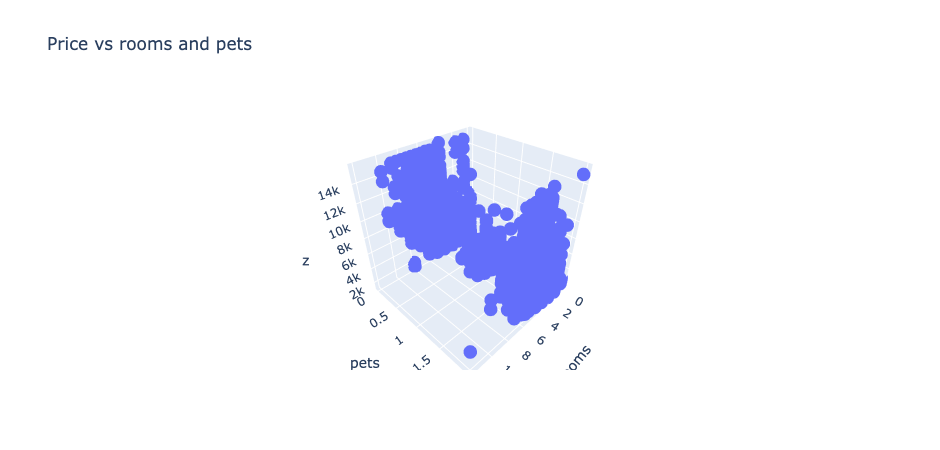

In [75]:
px.scatter_3d(
    X_train,
    x= "rooms", 
    y='pets', 
    z=y_train, 
    title='Price vs rooms and pets'
)

In [76]:
print('Intercept', lr.intercept_)
# second argument is the index
print("\ncoefficients:")
coefficients = pd.Series(coefficient, ["rooms", "pets"])
coefficients


Intercept 1270.6609889046963

coefficients:


rooms    809.544486
pets     100.974089
dtype: float64

In [97]:
import itertools
import plotly.graph_objs as go

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    
    # list of all combinations
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    print("xcoords, ycoords, predictions, Z:\n", xcoords.shape, ycoords.shape, predictions.shape, Z.shape)

    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

xcoords, ycoords, predictions, Z:
 (100,) (100,) (10000,) (100, 100)


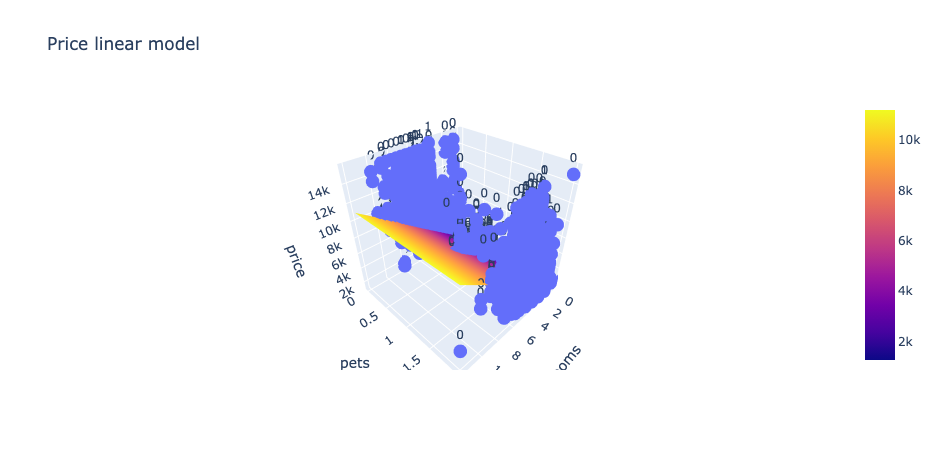

In [100]:
regression_3d(
    df[mask_Bjune],
    x='rooms', 
    y='pets', 
    z='price', 
    text='new_construction', 
    title='Price linear model'
)